In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# get the current directory
import os
cwd=os.getcwd()
cwd

'l:\\USGSEsriWCMC_GlobalIslands_v3\\python'

In [2]:
# read ; seperated csv from island_names.csv
df = pd.read_csv('island_nations.csv', sep=';', thousands=',')
# convert Population (total) to numeric
# save as excel file
df.to_excel('island_nations.xlsx')

df.dtypes
list(df.columns.values)

['Name',
 'Location',
 'Number of Islands (approx.)',
 'Island Details',
 'Type of Islands',
 'Surface Area (km&sup2;)',
 'Terrain',
 'Highest Elevation (m)',
 'Highest Elevation (name)',
 'Isolation Index',
 'Climate Risk Index Rank (1993-2012)',
 'Mean Sea Level Trends (mm/year)',
 'Mean Sea Level (meta)',
 'Population (total)',
 'Census Year [Population (total)]',
 'Population Density (p/km²)',
 'Census Year [Population Density (p/km²)]',
 'Population Growth (annual %)',
 'Census Year [Population Growth (annual %)]',
 'GDP (per capita in current US$)',
 'Census Year (GDP)',
 'Dominant Economic Sectors',
 'HDI',
 'Census Year (HDI)',
 'Administration',
 'Miscellaneous',
 'Unnamed: 26']

In [3]:
sublist=[
 'Location',
 'Number of Islands (approx.)',
 'Surface Area (km&sup2;)',
 'Highest Elevation (m)',
 'Isolation Index',
 'Climate Risk Index Rank (1993-2012)',
 'Mean Sea Level Trends (mm/year)',
 'Population (total)',
 'Population Density (p/km²)',
 'Population Growth (annual %)',
 'GDP (per capita in current US$)',
 'HDI',]

In [4]:
sids_list = [
    'American Samoa', 'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Belize',
    'Cape Verde', 'Comoros', 'Cook Islands', 'Dominica', 'Fiji', 'Grenada',
    'Guinea-Bissau', 'Guyana', 'Haiti', 'Jamaica', 'Kiribati', 'Maldives',
    'Marshall Islands', 'Mauritius', 'Federated State of Micronesia', 'Nauru',
    'Niue', 'Palau', 'Papua New Guinea', 'Saint Kitts and Nevis', 'Saint Lucia',
    'Saint Vincent and the Grenadines', 'Samoa', 'São Tomé und Príncipe', 'Seychelles',
    'Solomon Islands', 'Suriname', 'Timor-Leste', 'Tonga', 'Trinidad & Tobago',
    'Tuvalu', 'Vanuatu'
]

other_territories_list = [
    'Amrum', 'Anguilla', 'Bahrain', 'Bermuda', 'British Virgin Islands', 'Brunei',
    'Cayman Islands', 'Commonwealth of the Northern Marianas', 'Cuba', 'Curaçao',
    'Dominican Republic', 'Fehmarn', 'Föhr', 'French Polynesia', 'Gröde', 'Guadeloupe',
    'Guam', 'Habel', 'Helgoland', 'Hooge', 'Iceland', 'La Désirade', 'Langeneß',
    'Martinique', 'Montserrat', 'New Caledonia', 'Norderoog', 'Nordstrandischmoor',
    'Oland', 'Pellworm', 'Puerto Rico', 'Réunion', 'Rügen', 'Sarichef Island',
    'Singapore', 'Sint Maarten', 'Süderoog', 'Südfall', 'Sylt', 'Ternate', 'Tiran & Sanafir',
    'Turks and Caicos Islands', 'U.S. Virgin Islands', 'Usedom', 'Venice (centro storico)',
    'Viti Levu'
]

# go through the df add a new column 
# go through the sids_list and other_territories_list
# mark the rows with 'SIDS' or 'Other' in the new column

for sid in sids_list:
    df.loc[df['Name'] == sid, 'Type'] = 'SIDS'
for others in other_territories_list:
    df.loc[df['Name'] == others, 'Type'] = 'Other'
# now print if there are any rows with NaN in the Type column
# fix if location is Carrabean and Name starts with Cur then set type as Other
df.loc[(df['Location'] == 'Caribbean') & (df['Name'].str.startswith('Cura')), 'Type'] = 'Other'
# fix if location is Arctic Ocean and Name starts with Sarichef then set type as Other
df.loc[(df['Location'] == 'Arctic Ocean') & (df['Name'].str.startswith('Sarichef')), 'Type'] = 'Other'
df[df['Type'].isnull()]

,Name,Location,Number of Islands (approx.),Island Details,Type of Islands,Surface Area (km&sup2;),Terrain,Highest Elevation (m),Highest Elevation (name),Isolation Index,...,Census Year [Population Growth (annual %)],GDP (per capita in current US$),Census Year (GDP),Dominant Economic Sectors,HDI,Census Year (HDI),Administration,Miscellaneous,Unnamed: 26,Type


<Axes: xlabel='Location'>

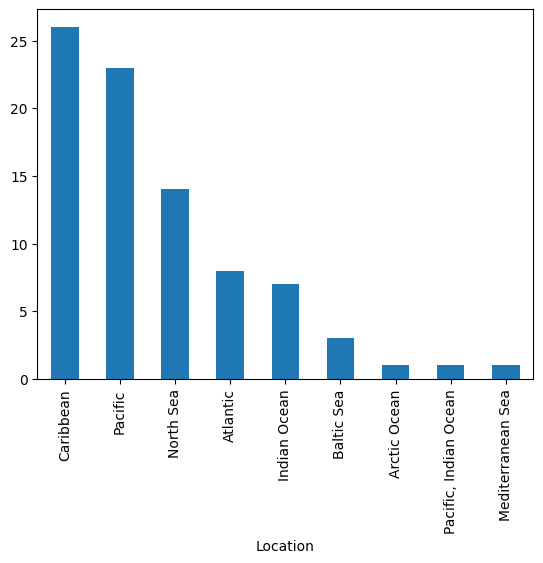

In [5]:
# plot the number of islands in each 'Location'
df['Location'].value_counts().plot(kind='bar')

<Axes: xlabel='Location'>

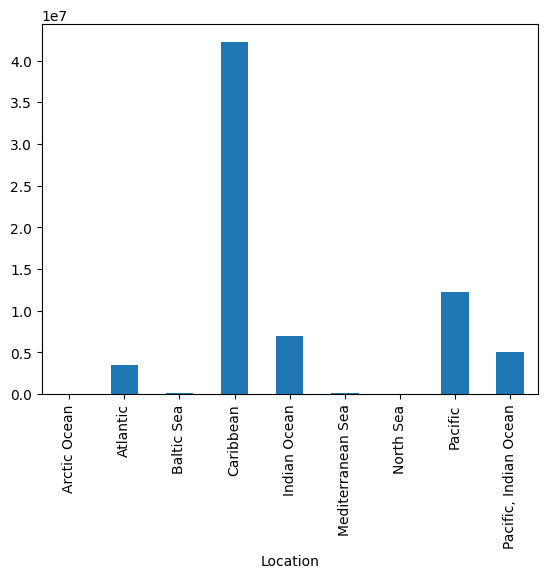

In [6]:
# plot the total population  of islands in each 'Location'
df.groupby('Location')['Population (total)'].sum().plot(kind='bar')

In [7]:
#sns.pairplot(df[sublist], hue="Location")
#sns.set_theme(rc={'figure.figsize':(25,25)})

In [8]:
#for col in sublist:
#    if col=="Location": continue
#    print (f"{col}: {df[col].dtype}, min: {df[col].min()}, max: {df[col].max()}")
#    sns.displot(df, x=col, hue="Location", kind="kde", fill=True)

Number of Islands (approx.): float64, min: 1.0, max: 1225.0


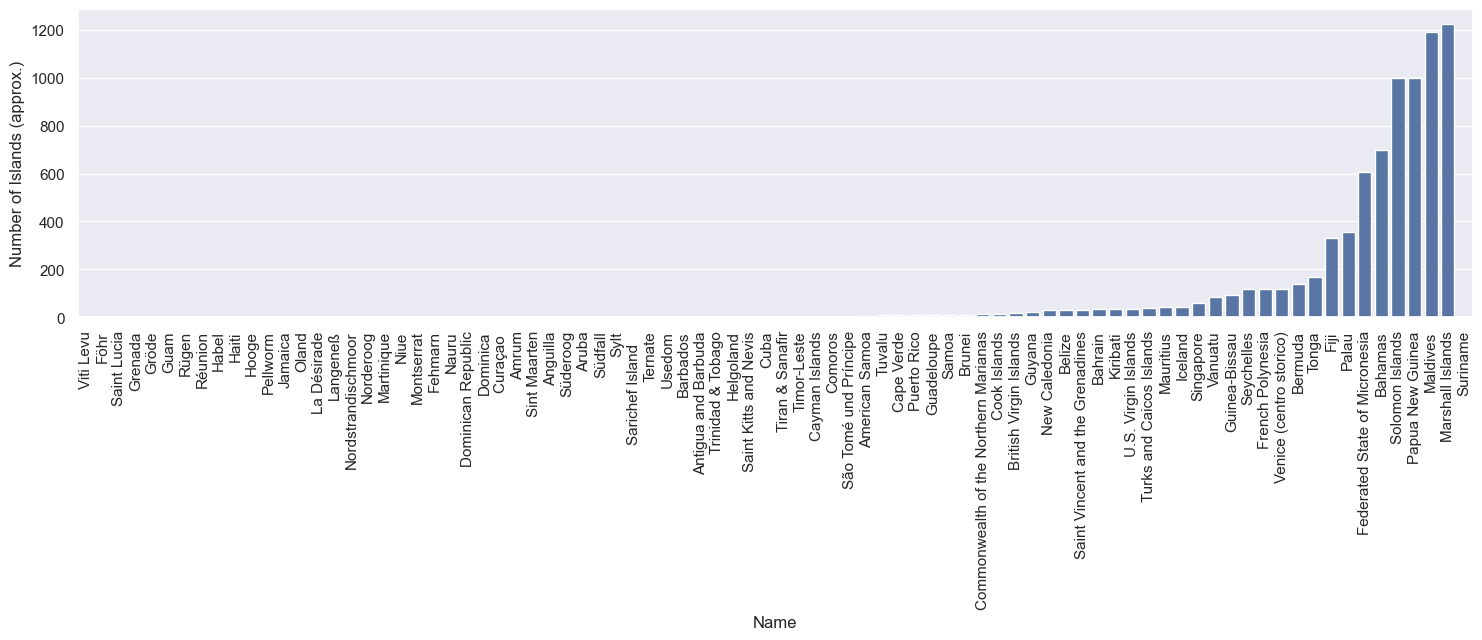

Surface Area (km&sup2;): float64, min: 0.07, max: 462840.0


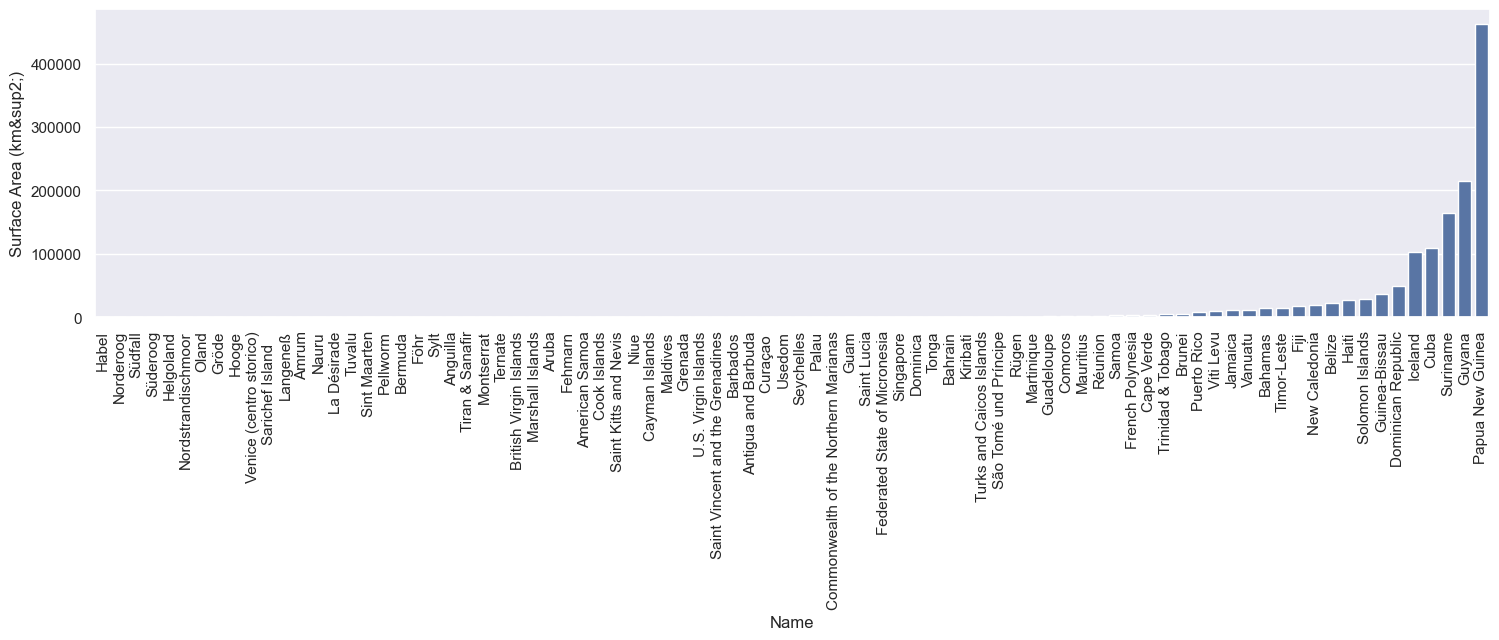

Highest Elevation (m): float64, min: 1.0, max: 4509.0


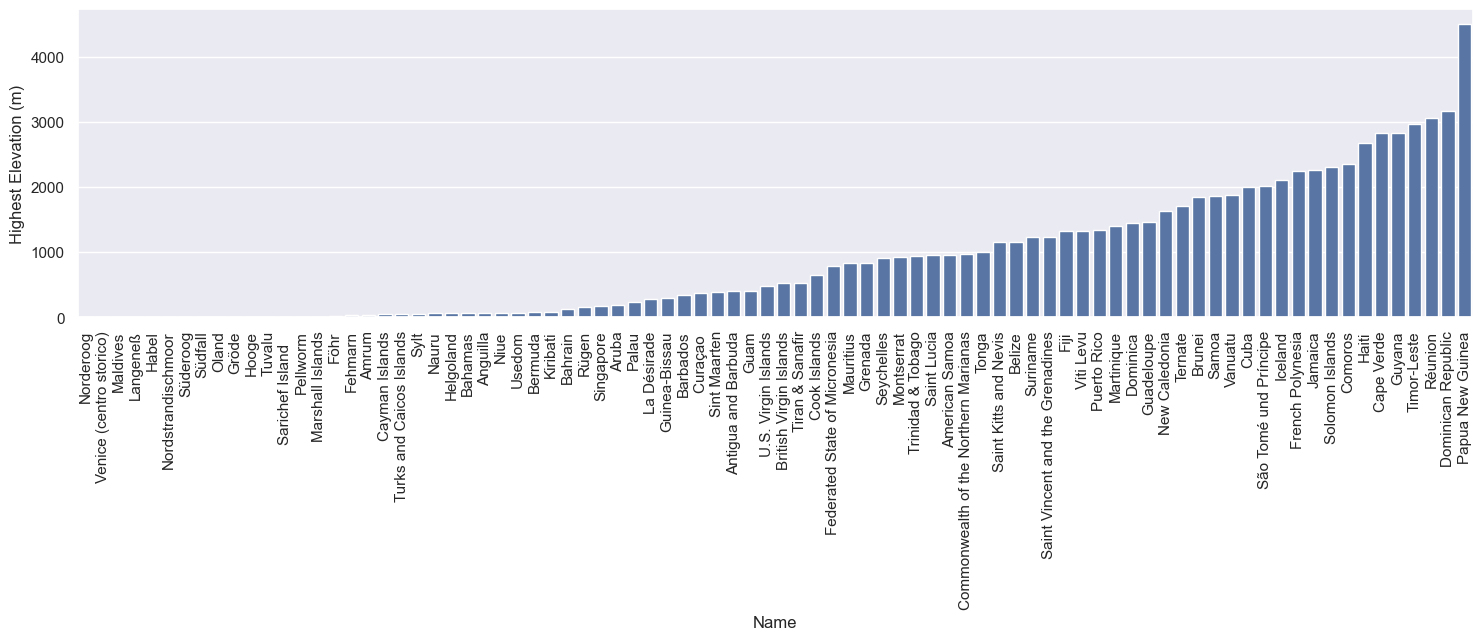

Isolation Index: float64, min: -99.0, max: 108.0


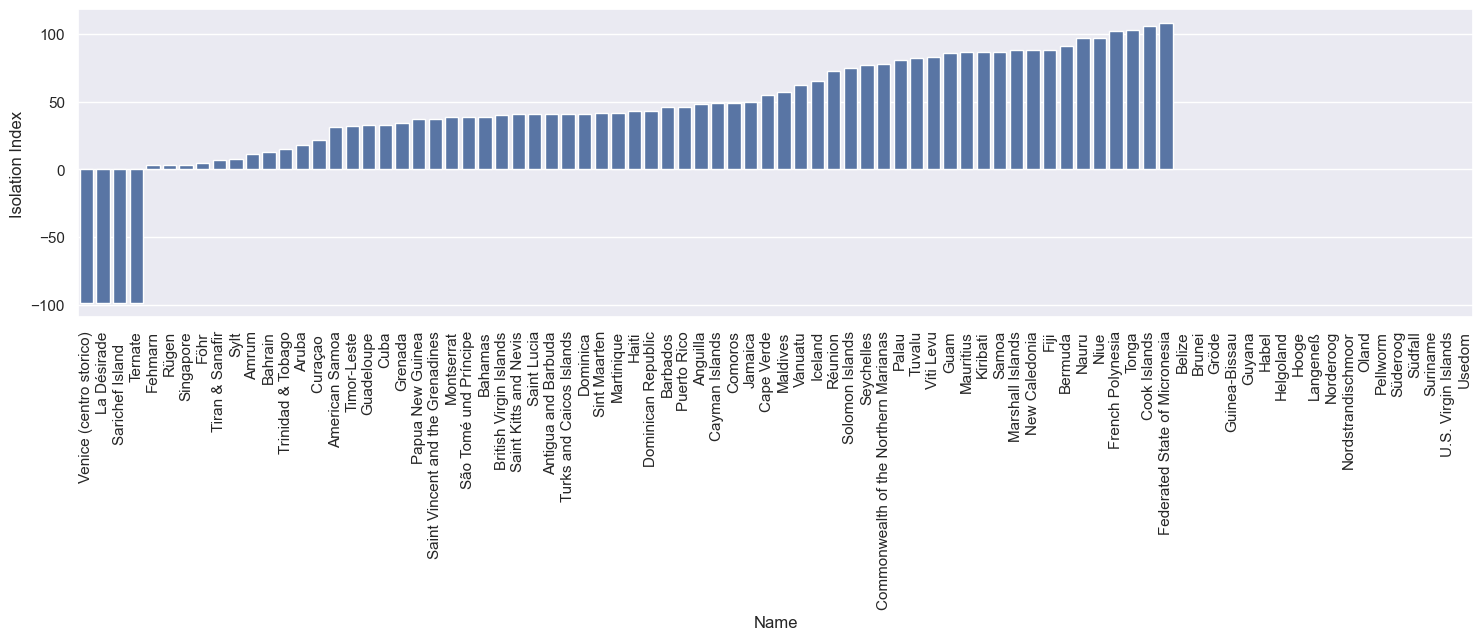

Climate Risk Index Rank (1993-2012): float64, min: 3.0, max: 178.0


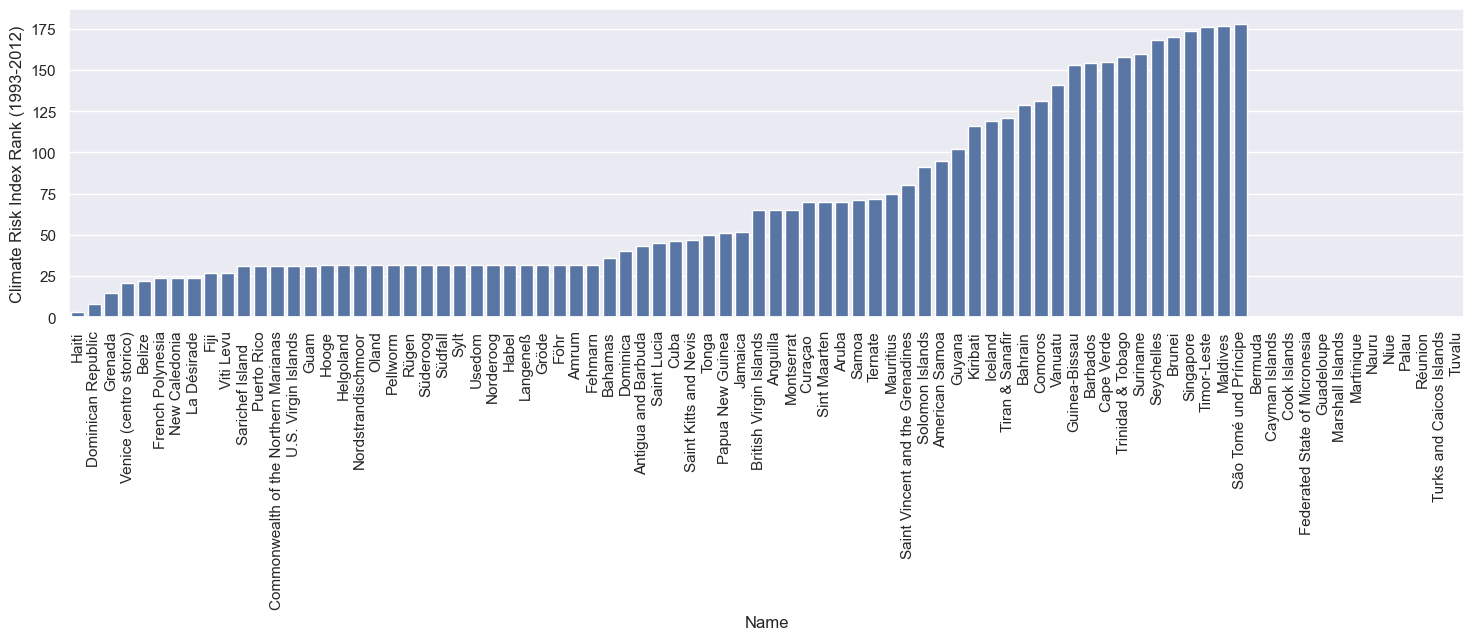

Mean Sea Level Trends (mm/year): float64, min: -99.0, max: 6.3


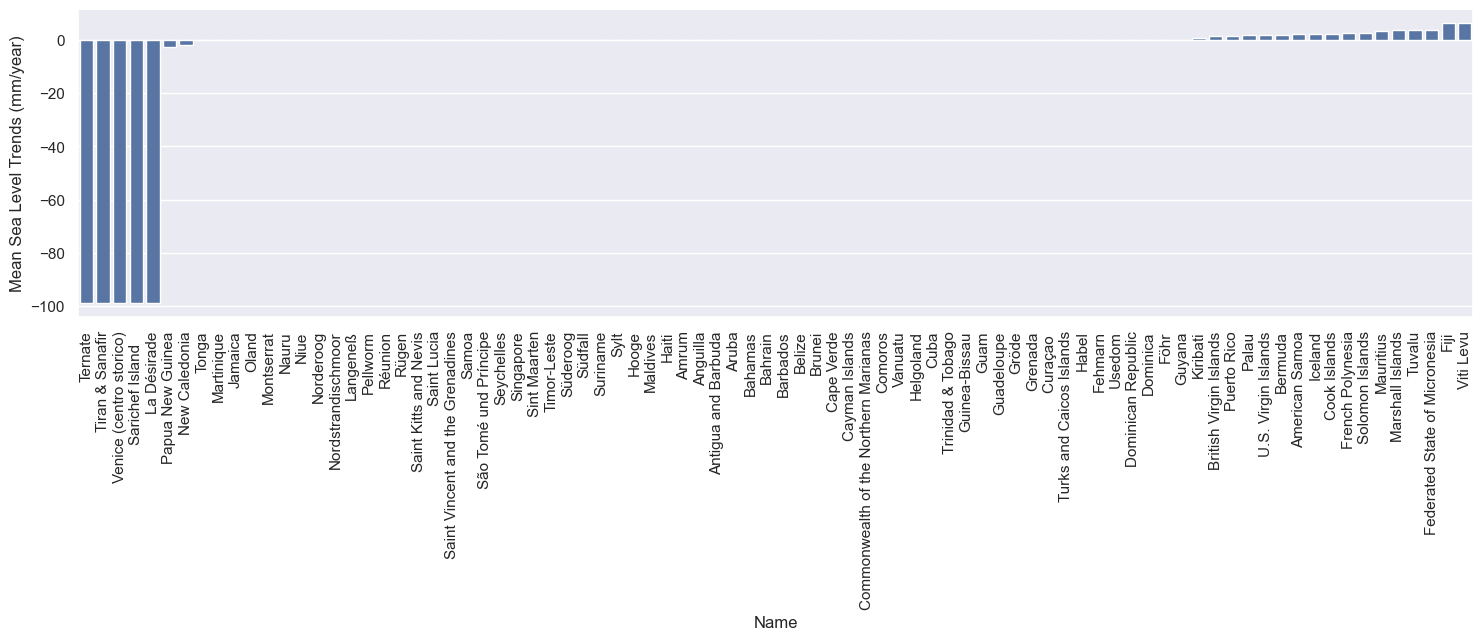

Population (total): float64, min: 1.0, max: 11257979.0


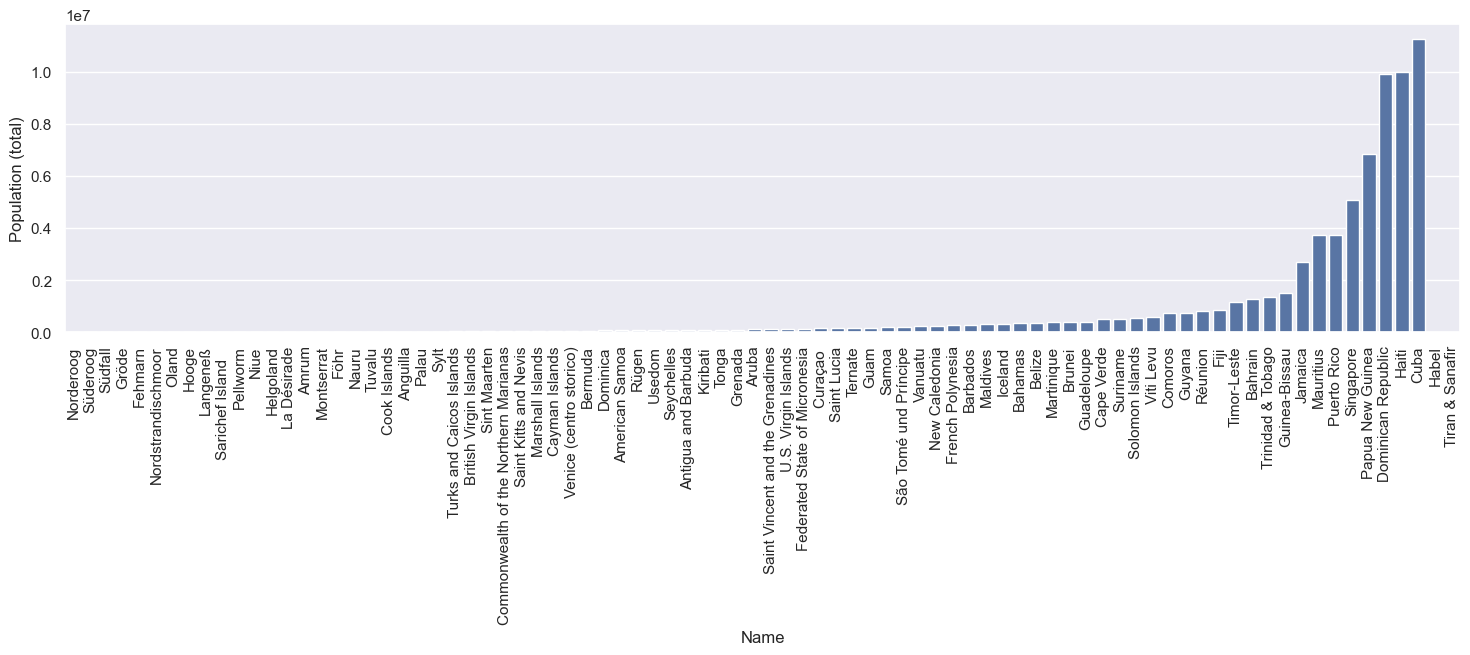

Population Density (p/km²): float64, min: 0.0, max: 8531.6


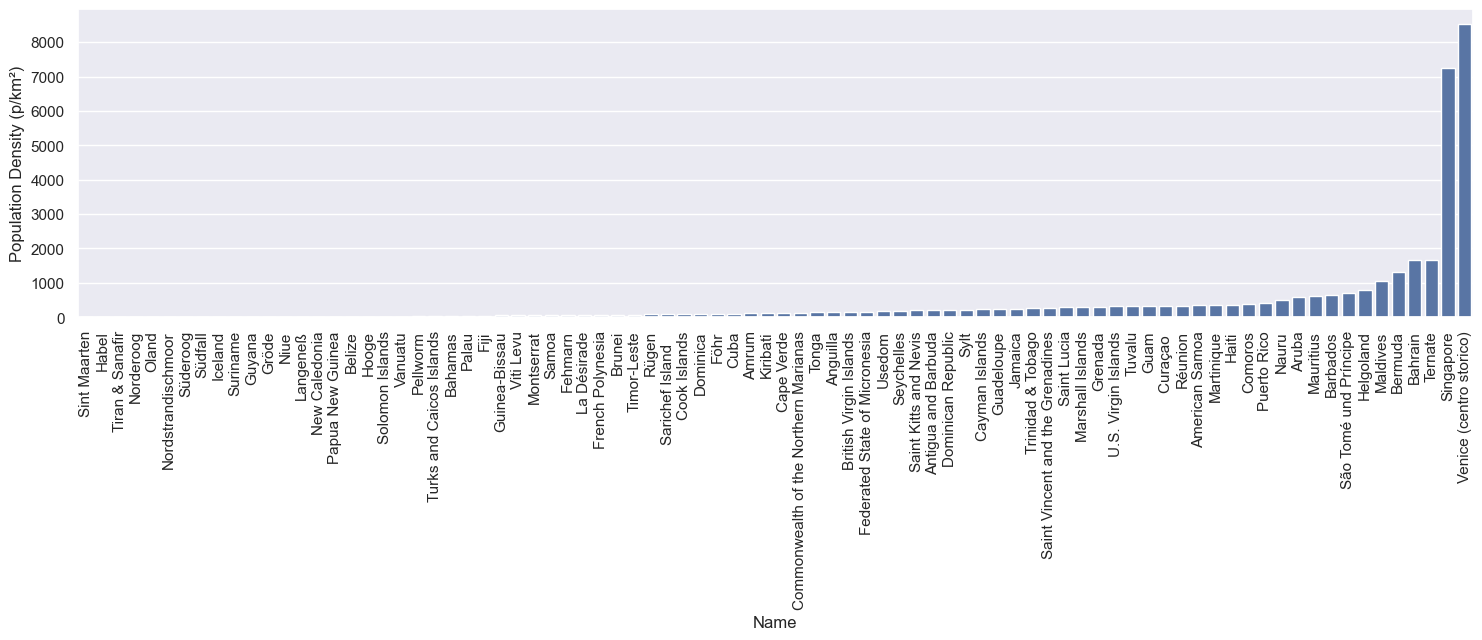

Population Growth (annual %): float64, min: -99.0, max: 7.592


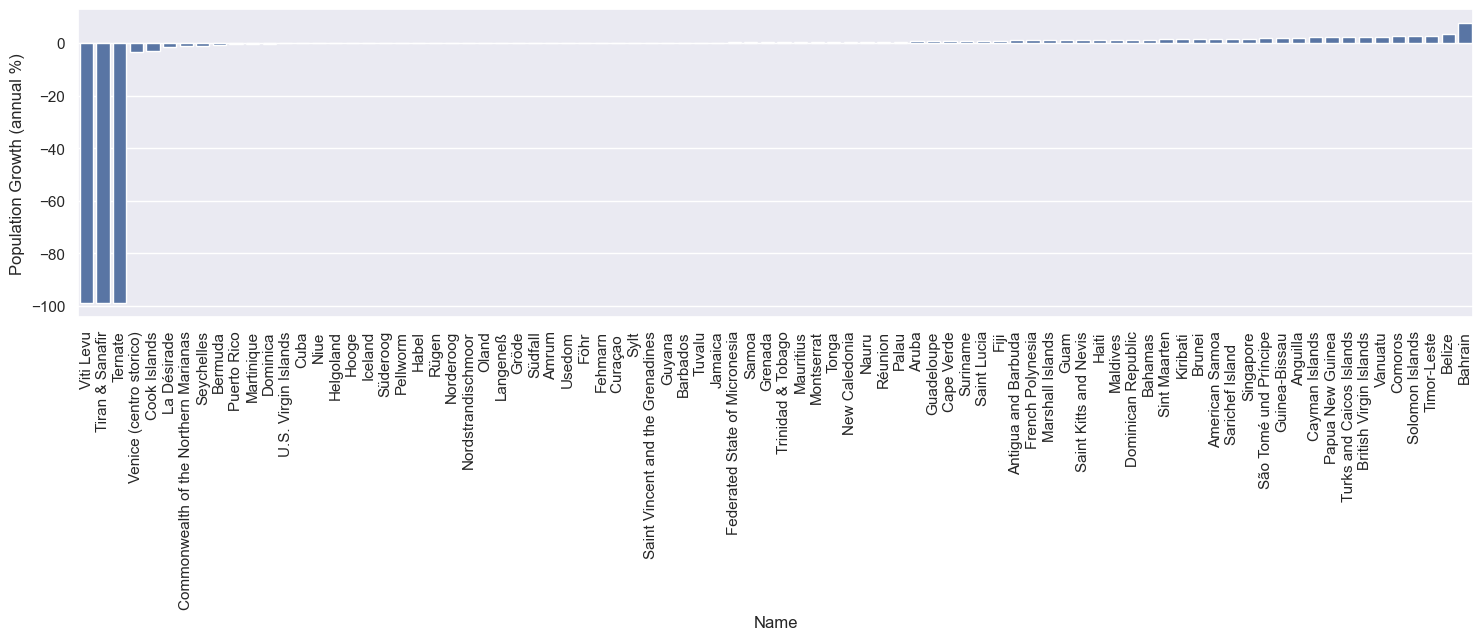

GDP (per capita in current US$): float64, min: -99.0, max: 88207.0


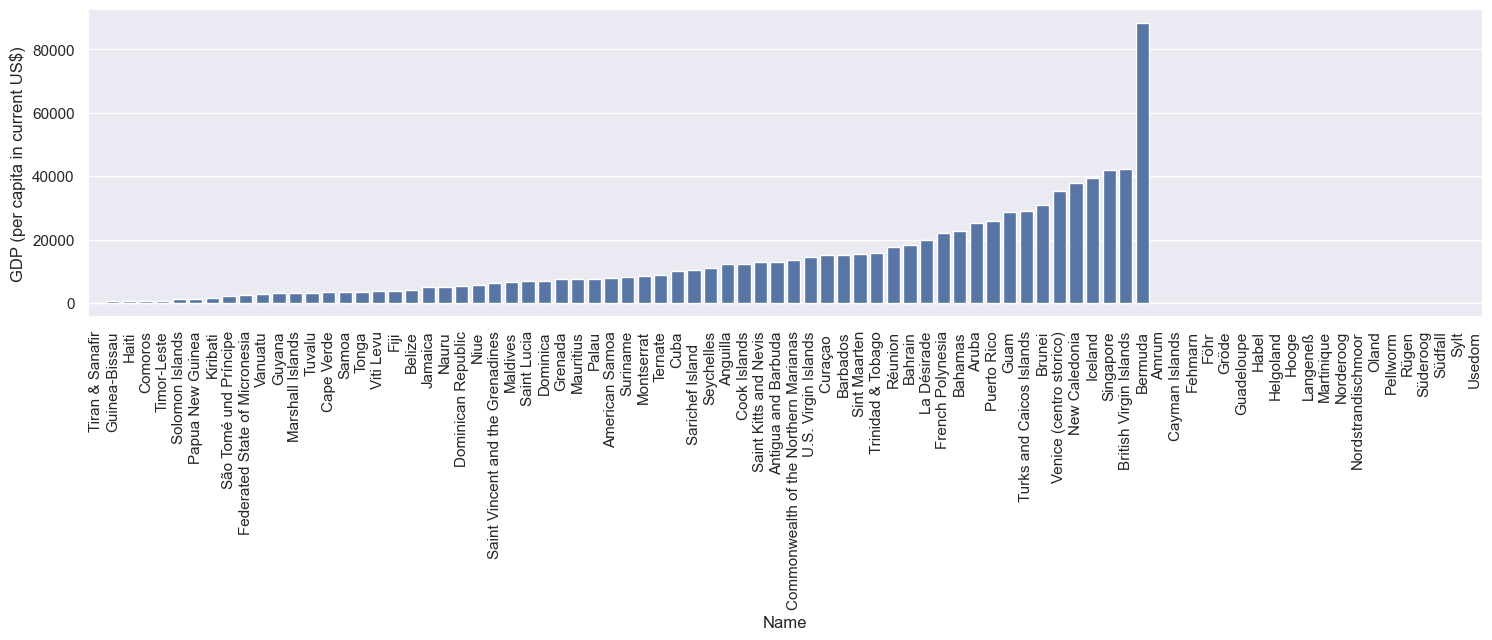

HDI: float64, min: 0.0, max: 0.983


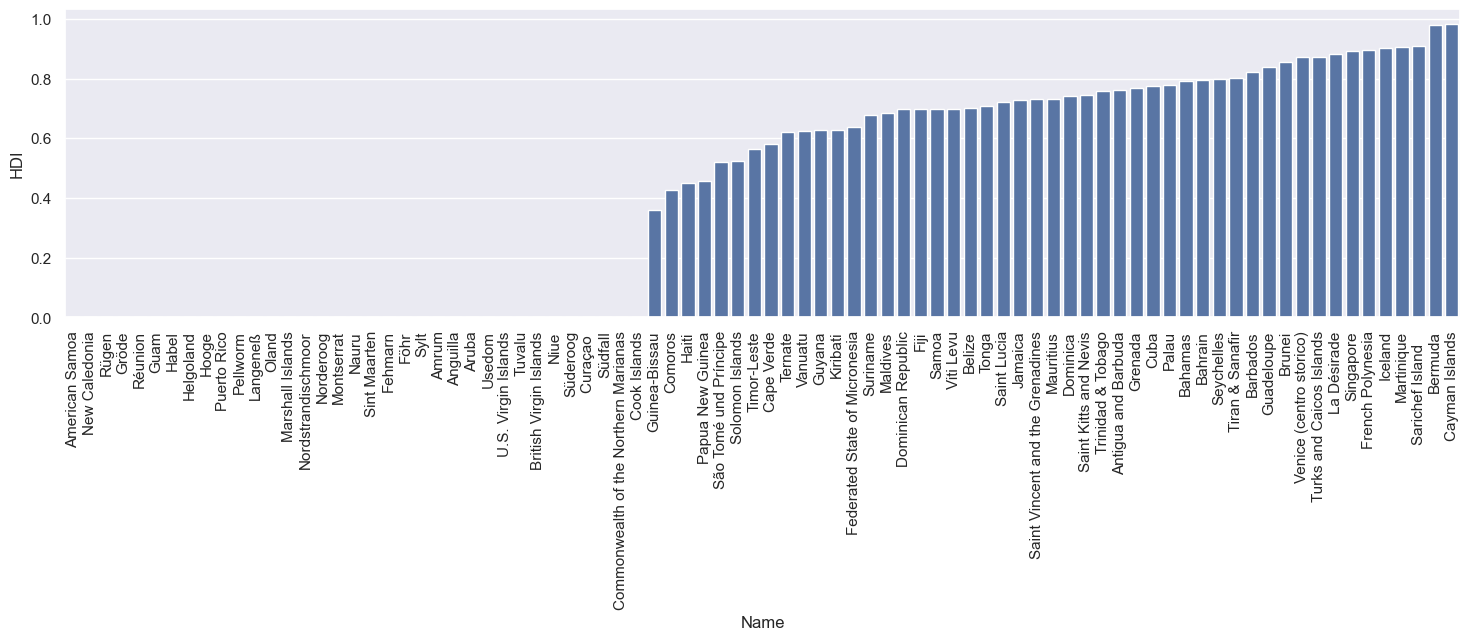

In [9]:
# for each in collist plot the values for each Name as bar plot
for col in sublist:
    if col=="Location": continue
    print (f"{col}: {df[col].dtype}, min: {df[col].min()}, max: {df[col].max()}")
    sns.set_theme(rc={'figure.figsize':(18,4)})
    # sort the values by the column and plot
    sns.barplot(x="Name", y=col, data=df.sort_values([col]).reset_index(drop=True))
    plt.xticks(rotation=90)
    plt.show()

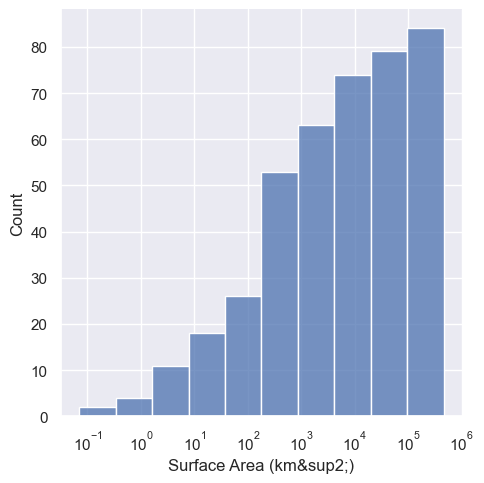

In [10]:
sns.displot(df, x='Surface Area (km&sup2;)',  kind="hist", fill=True, log_scale=True, cumulative=True)

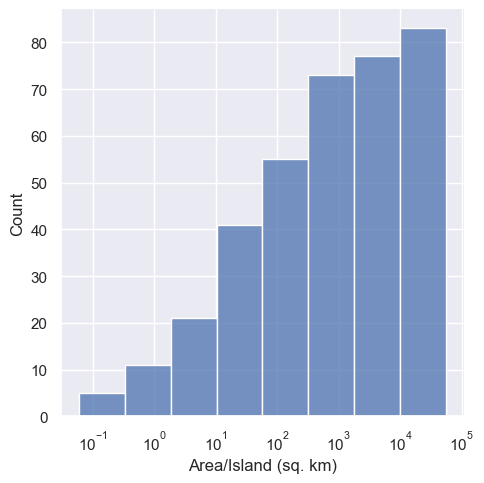

In [11]:
df[ 'Area/Island (sq. km)']=df['Surface Area (km&sup2;)']/df['Number of Islands (approx.)']
sns.displot(df, x='Area/Island (sq. km)',  kind="hist", fill=True, log_scale=True, cumulative=True)

In [12]:
df.columns

Index(['Name', 'Location', 'Number of Islands (approx.)', 'Island Details',
       'Type of Islands', 'Surface Area (km&sup2;)', 'Terrain',
       'Highest Elevation (m)', 'Highest Elevation (name)', 'Isolation Index',
       'Climate Risk Index Rank (1993-2012)',
       'Mean Sea Level Trends (mm/year)', 'Mean Sea Level (meta)',
       'Population (total)', 'Census Year [Population (total)]',
       'Population Density (p/km²)',
       'Census Year [Population Density (p/km²)]',
       'Population Growth (annual %)',
       'Census Year [Population Growth (annual %)]',
       'GDP (per capita in current US$)', 'Census Year (GDP)',
       'Dominant Economic Sectors', 'HDI', 'Census Year (HDI)',
       'Administration', 'Miscellaneous', 'Unnamed: 26', 'Type',
       'Area/Island (sq. km)'],
      dtype='object')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


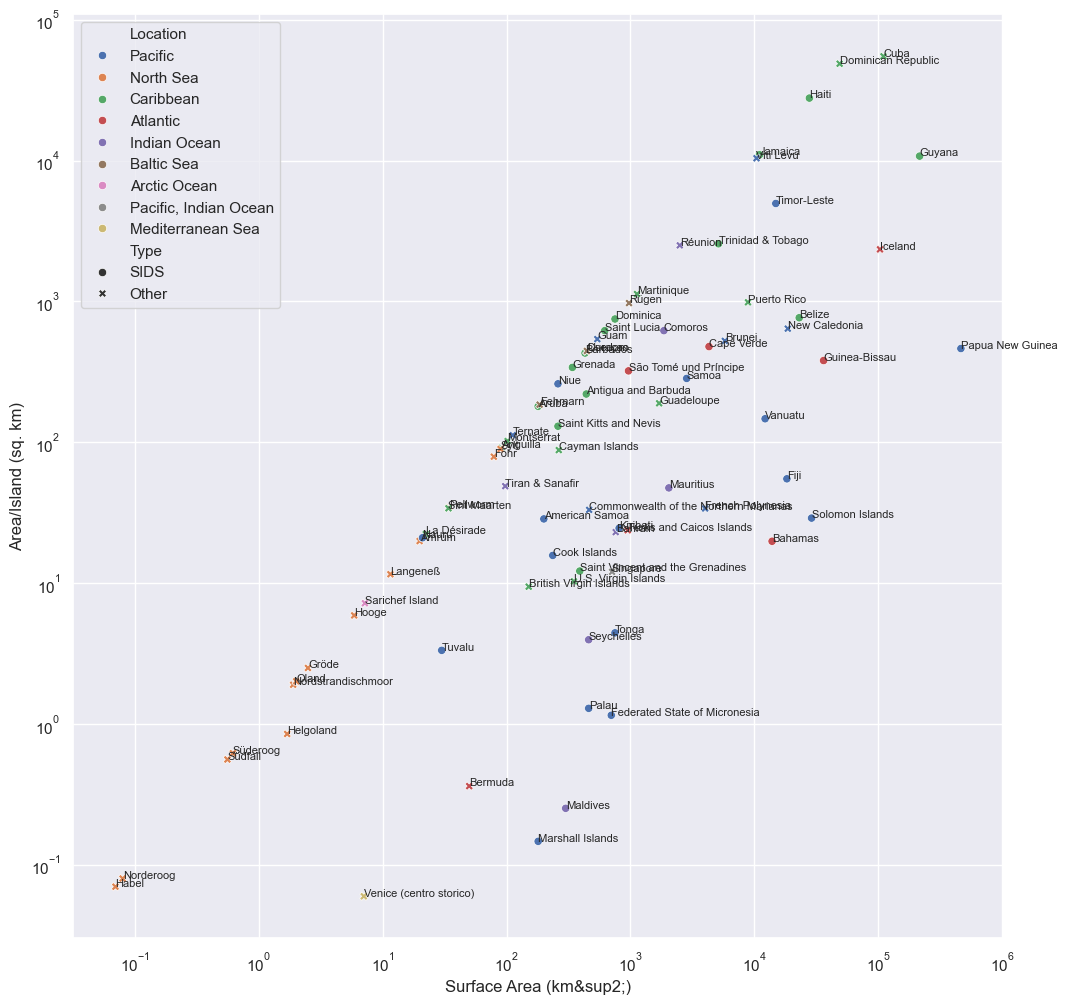

In [18]:
# scatter plot with Surface Area (km&sup2;) and Area/Island (sq. km)  log log scale
sns.set_theme(rc={'figure.figsize':(12,12)})
ax=sns.scatterplot(data=df, x='Surface Area (km&sup2;)', y='Area/Island (sq. km)', hue='Location', style='Type')
plt.yscale('log')
plt.xscale('log')
# Label each point with the 'Name' column
for i in range(len(df)):
    ax.text(df['Surface Area (km&sup2;)'][i], df['Area/Island (sq. km)'][i], df['Name'][i],
            horizontalalignment='left', fontsize=8)

In [14]:
df.columns

Index(['Name', 'Location', 'Number of Islands (approx.)', 'Island Details',
       'Type of Islands', 'Surface Area (km&sup2;)', 'Terrain',
       'Highest Elevation (m)', 'Highest Elevation (name)', 'Isolation Index',
       'Climate Risk Index Rank (1993-2012)',
       'Mean Sea Level Trends (mm/year)', 'Mean Sea Level (meta)',
       'Population (total)', 'Census Year [Population (total)]',
       'Population Density (p/km²)',
       'Census Year [Population Density (p/km²)]',
       'Population Growth (annual %)',
       'Census Year [Population Growth (annual %)]',
       'GDP (per capita in current US$)', 'Census Year (GDP)',
       'Dominant Economic Sectors', 'HDI', 'Census Year (HDI)',
       'Administration', 'Miscellaneous', 'Unnamed: 26', 'Type',
       'Area/Island (sq. km)'],
      dtype='object')

Text(100000, 100, '#Islands=1000')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


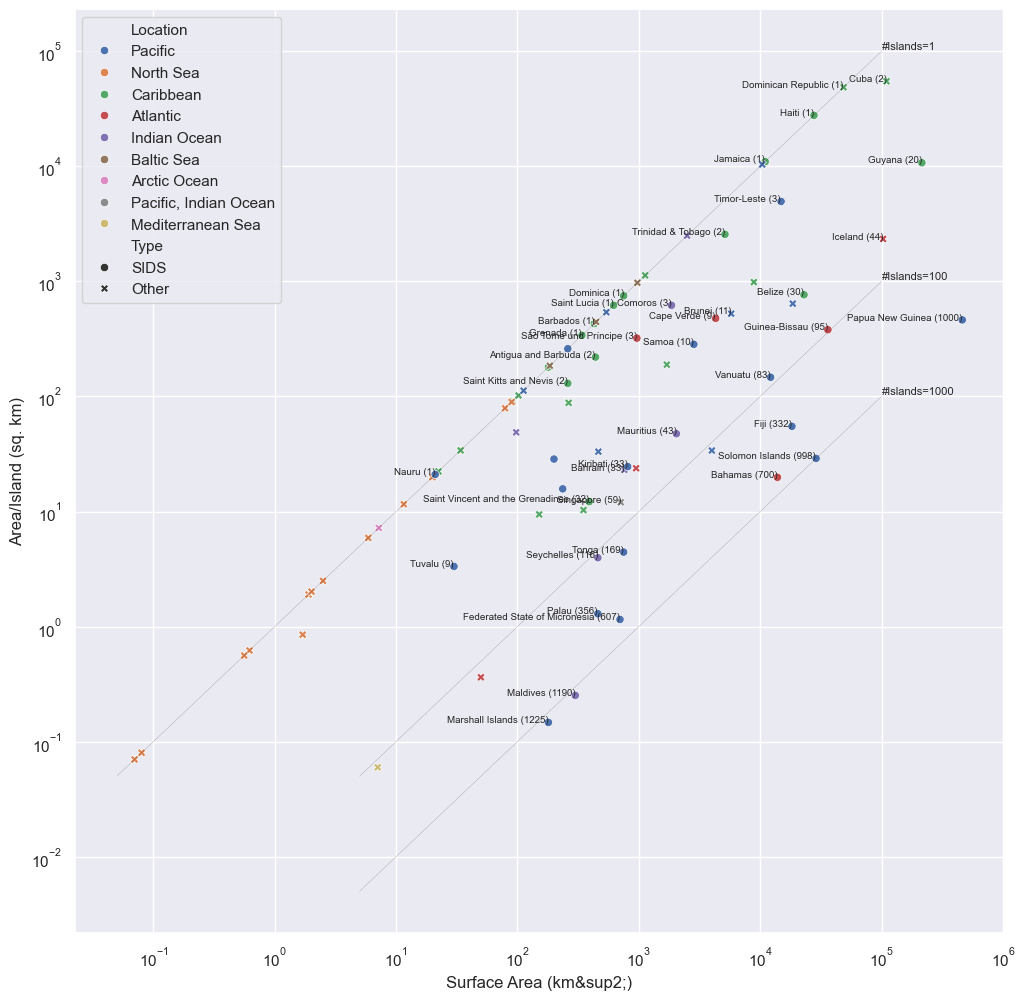

In [19]:
# scatter plot with Surface Area (km&sup2;) and Area/Island (sq. km)  log log scale
sns.set_theme(rc={'figure.figsize':(12,12)})
ax=sns.scatterplot(data=df, x='Surface Area (km&sup2;)', y='Area/Island (sq. km)', hue='Location', style='Type')
# create a new column NameX with the Name and the number of islands within parentheses
df['NameX']=df['Name']+' ('+df['Number of Islands (approx.)'].apply(lambda x: f'{x:.0f}')+')'
plt.yscale('log')
plt.xscale('log')
# Label each point with the 'Name' column
for i in range(len(df)):
    # if Administration contains independant plot, otherwise ignore
    #print(df['Administration'][i])
    if 'independent ' in df['Administration'][i]:
        ax.text(df['Surface Area (km&sup2;)'][i], df['Area/Island (sq. km)'][i], df['NameX'][i],
            horizontalalignment='right', fontsize=7)
# draw a 45 degree line
plt.plot([.05, 100000], [.05, 100000], 'k-', lw=.1)
# label the line with the slope at the end of the line parallel to the line
plt.text(100000, 100000, '#Islands=1', fontsize=8, verticalalignment='bottom')
plt.plot([5, 100000], [.05, 1000], 'k-', lw=.1)
plt.text(100000, 1000, '#Islands=100', fontsize=8, verticalalignment='bottom')
plt.plot([5, 100000], [.005, 100], 'k-', lw=.1)
plt.text(100000, 100, '#Islands=1000', fontsize=8, verticalalignment='bottom')

In [16]:
df['Administration'].unique()

array(['dependent (territory of the US)',
       'dependent (autonomous parliamentary democracy, but part of the Kingdom of the Netherlands)',
       'dependent (territory of the UK)',
       'independent (constitutional monarchy with a parliamentary system of government and a Commonwealth realm)',
       'independent (constitutional parliamentary democracy and a Commonwealth realm)',
       'independent (constitutional monarchy)',
       'independent (parliamentary democracy and a Commonwealth realm)',
       'dependent (overseas territory of the UK)',
       'dependent (overseas territory of the UK; internal self-governing)',
       'independent (constitutional sultanate (locally known as Malay Islamic Monarchy))',
       'independent (republic)',
       'dependent (commonwealth; self-governing with locally elected governor, lieutenant governor, and legislature)',
       'independent  (socialist state)',
       'independent (member of the Commonwealth of Nations - parliamentary democ

In [17]:
# list the names with 1000 or more approx. islands
# sort by the number of islands
df[df['Number of Islands (approx.)']>=100].sort_values('Number of Islands (approx.)', ascending=False)['NameX']

42                Marshall Islands (1225)
41                        Maldives (1190)
53                Papua New Guinea (1000)
67                  Solomon Islands (998)
5                           Bahamas (700)
21    Federated State of Micronesia (607)
52                            Palau (356)
23                             Fiji (332)
75                            Tonga (169)
9                           Bermuda (138)
25                 French Polynesia (118)
82          Venice (centro storico) (118)
64                       Seychelles (116)
Name: NameX, dtype: object